- Input: Screenshot
- Output: Action (Click, type, Enter,...)
- Works on an (internal) screen. Can only see things with screenshots



An instance of Browser Automation:
+ Login Facebook
+ Locate your crush's story
+ If available: Watch, else go back.

#### Before running this script

A Firefox browser is running on screen 99 already, but just in case u wanna run another:

Create another screen to run browser on (Theoretically could run on the main screen but don't have access to that right now).

`$ screen -r 7545.pts-6.tung-torch` 

[In the screen]

`$ DISPLAY=:99 firefox` (where 99 is the id of the new screen)

to start a new virtual/internal screen.

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt # To plot images
import cv2 # Image processing library

import sys
sys.path.insert(0, '../') # Access the parent folder

# All source code
from src.img_utils import (extract_object, 
                           extract_all_objects)
from src.visual_bot import VisualBot

#### Initialize VisualBot 

In [4]:
vb = VisualBot(display="99") # Screen id 99

Loading text_crop_model weights from checkpoint (../weights/craft_mlt_25k.pth)
Loading text_crop_model weights from checkpoint (/home/tung/pj/sel/deep-text-recognition-benchmark/weights/TPS-ResNet-BiLSTM-CTC.pth)


#### Show the screen

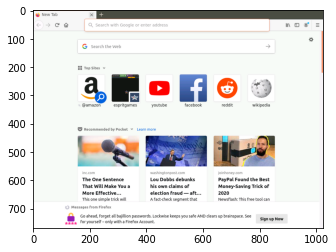

In [7]:
I = vb.capture_screenshot()
plt.imshow(I)
plt.show()

#### Login

In [10]:
# Bounding box is a rectangle. Only contains top-left and bottom-right corners for now
bounding_box, additional_stuffs = vb.extract_text(I, "address") # Find the word "address" from the image
                                                                #  (Can only find 1 word at a time for now)
print("The word is at", bounding_box)

Bounding box found: [(419, 44), (478, 60)]
Confidence: 0.31316813826560974
Bounding box found: [(198, 48), (209, 57)]
Confidence: 0.15909458696842194
Bounding box found: [(924, 48), (936, 59)]
Confidence: 0.004565749317407608
Bounding box found: [(179, 232), (233, 297)]
Confidence: 0.2635655999183655
Bounding box found: [(585, 464), (600, 481)]
Confidence: 0.057530101388692856
Bounding box found: [(532, 641), (552, 651)]
Confidence: 1.673630868026521e-05
Bounding box found: [(414, 660), (424, 675)]
Confidence: 0.021108269691467285
Elapsed:  0.9237504005432129 (s)
The word is at [(419, 44), (478, 60)]


In [18]:
def show_bbox(I, bbox):
    """Show bounding box on image"""
    I_copy = I.copy()
    top_left, bottom_right = bbox
    cv2.rectangle(I_copy, top_left, bottom_right, 255, 2)
    plt.imshow(I_copy)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


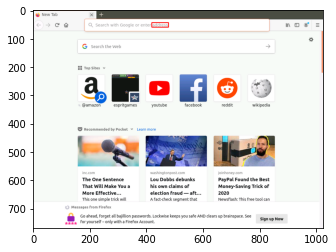

In [21]:
show_bbox(I, bounding_box)

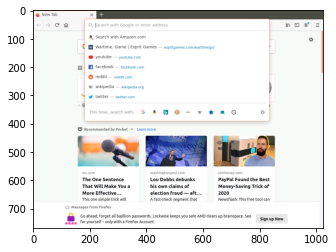

In [22]:
# Click
vb.click_bbox(bounding_box) # Click at the center of the bounding box

# Show current screen
plt.imshow(vb.capture_screenshot())
plt.show()

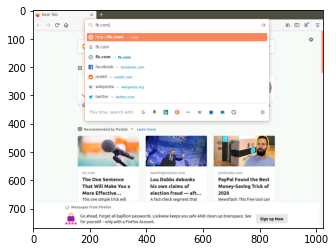

In [23]:
# Type 
vb.write("fb.com") # Gonna change the name to vb.type() in the future. Am lazy

plt.imshow(vb.capture_screenshot())
plt.show()

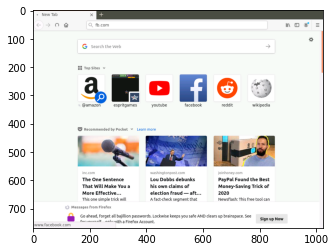

In [24]:
# Enter
vb.enter()

plt.imshow(vb.capture_screenshot())
plt.show()

#### Find all stories

In [25]:
import time
time.sleep(1) # Wait till facebook shows up

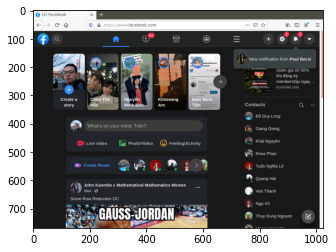

In [26]:
# What do we have here
plt.imshow(vb.capture_screenshot())
plt.show()

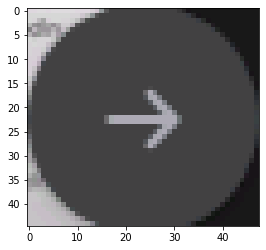

In [36]:
# Manually cut an object (the "more stories" arrow button)
I = vb.capture_screenshot()
# Remember, when slicing images, y coord then x coord then 3 image channels (don't worry ob channels yet)
arrow_button = I[230:275, 637:685]
# plt.imsave('../templates/fb_arrow_button.png', arrow_button) # Uncomment to save, but not for now
plt.imshow(arrow_button) 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


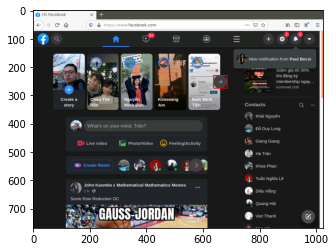

((637, 230), (685, 275))

In [43]:
# Detect the button again, for the sake of demonstration
arrow_button = plt.imread('../templates/fb_arrow_button.png')[:,:,:3] 
# 4th color channel is added to this pic, only use first 3 (if we have 4th, there'll be error)

# This function is not included in VisualBot (yet), but we may in the future.
bounding_box = extract_object(arrow_button, I) # Will be extract_object(I, arrow_button) in future for consistency 
show_bbox(I, bounding_box)
bounding_box

In [48]:
# Click it
vb.click_bbox(bounding_box)

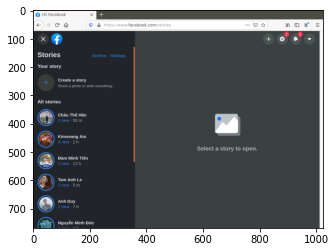

In [47]:
time.sleep(3) # Wait a bit
plt.imshow(vb.capture_screenshot())
plt.show()

Bounding box found: [(238, 12), (248, 22)]
Confidence: 5.2929022785974666e-05
Bounding box found: [(86, 257), (161, 277)]
Confidence: 0.942740797996521
Elapsed:  0.7230875492095947 (s)


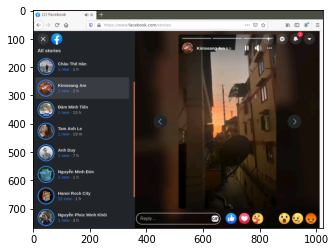

In [56]:
# vb.move_to(200, 300) # Move mouse to x coord and y coord

# [vb.scroll_down() for x in range(5)] # Scroll down 5 times (Notice scrolling is discrete/not continuous)

I = vb.capture_screenshot()
bounding_box, additional_stuffs = vb.extract_text(I, "kimseang")
if bounding_box == None: # Not found
    print("Your crush hasn't posted any story yet!")
else:
    # Story is found. Watch it
    vb.click_bbox(bounding_box)

time.sleep(1)
plt.imshow(vb.capture_screenshot())
plt.show()

The bot is still limited in many ways tho:
+ Cannot recognize many characters at once. 
+ Object recognition has limited accuracy, too many parameters. 
+ Reduced accuracy for recognizing the same object multiple times (threshold problem).
+ Smaller objects are problematic.